In [1]:
import numpy as np
import pandas as pd

dump_folder = './mem_dumps/'
dump_prefix = 'memory_dump_event_'
# test reading a memory dump
mem_dump = pd.read_csv(dump_folder + dump_prefix + '1.csv', header=0)
values = mem_dump['ch0'].to_numpy()  # Excludes header
img_8x8 = values.reshape((8, 8))

print(img_8x8)

[[ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [-2 -1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]


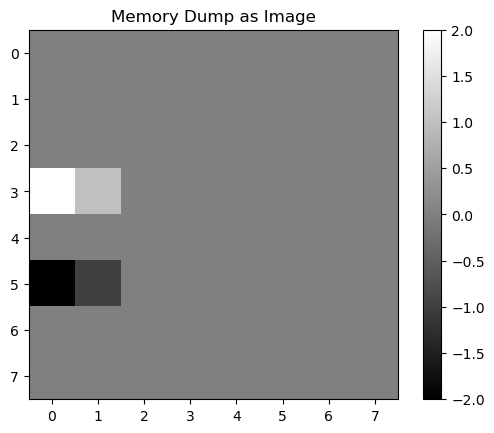

In [2]:
import matplotlib.pyplot as plt
plt.imshow(img_8x8, cmap='gray')
plt.title("Memory Dump as Image")
plt.colorbar()
plt.show()

In [ ]:
#1  04,00
#2  00,04
#3  07,07
#4  04,00
#5  00,04
#6  07,04
#7  04,07
#8  04,04
#9  06,06
#10 02,03

In [41]:
import torch
# Event location (from your events file: e.g., (2,2))


# Create 8x8 image with 1 at event location
event_img = np.zeros((8, 8), dtype=np.float32)
event_img[4, 0] = 1.0
event_img[0, 4] = 1.0  # Set the top-left corner to 1.0 as well
event_img[7, 7] = 1.0  # Set the bottom-right corner to 1.0 as well
event_img[4, 0] = 2.0  # Set the center to 1.0 as well
event_img[0, 4] = 2.0
event_img[7, 4] = 1.0  # Set the bottom-left corner to 1.0 as well
event_img[4, 7] = 1.0  # Set the center-right to 1.0 as well
event_img[4, 4] = 1.0  # Set the center to 1.0 as well
event_img[6, 6] = 1.0  # Set the center to 1.0 as well
event_img[2, 3] = 1.0  # Set the center to 1.0 as well
# Your kernel (as above)
hw_kernel = np.array([
    [-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]
], dtype=np.float32)
weight_tensor = torch.from_numpy(hw_kernel).unsqueeze(0).unsqueeze(0)

conv = torch.nn.Conv2d(
    in_channels=1, out_channels=1,
    kernel_size=3, padding=1, bias=False, padding_mode='zeros'
)
conv.weight.data = weight_tensor

img_tensor = torch.from_numpy(event_img).unsqueeze(0).unsqueeze(0).float()  # (1,1,8,8)

with torch.no_grad():
    out_tensor = conv(img_tensor)
out_img = out_tensor.squeeze().numpy()


[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [-2. -1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


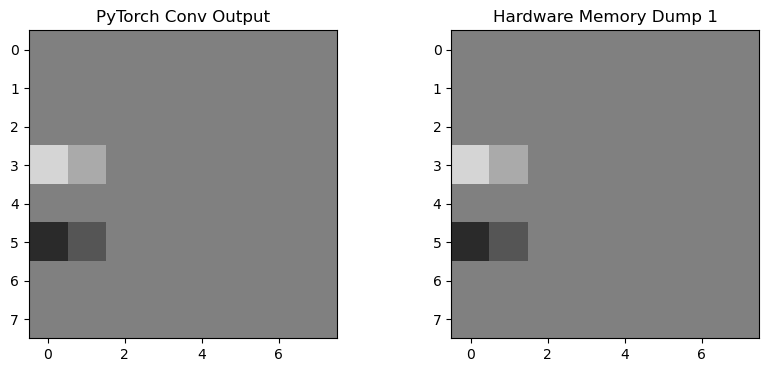

In [5]:
mem_dump1 = pd.read_csv(dump_folder + dump_prefix + '1.csv', header=0)
values1 = mem_dump1['ch0'].to_numpy()  # Excludes header
img_8x8_hw = values1.reshape((8, 8))

print(out_img)

# Plot both for comparison
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].imshow(out_img, cmap='gray', vmin=-3, vmax=3)
axs[0].set_title("PyTorch Conv Output")
axs[1].imshow(img_8x8_hw, cmap='gray', vmin=-3, vmax=3)
axs[1].set_title("Hardware Memory Dump 1")
plt.show()

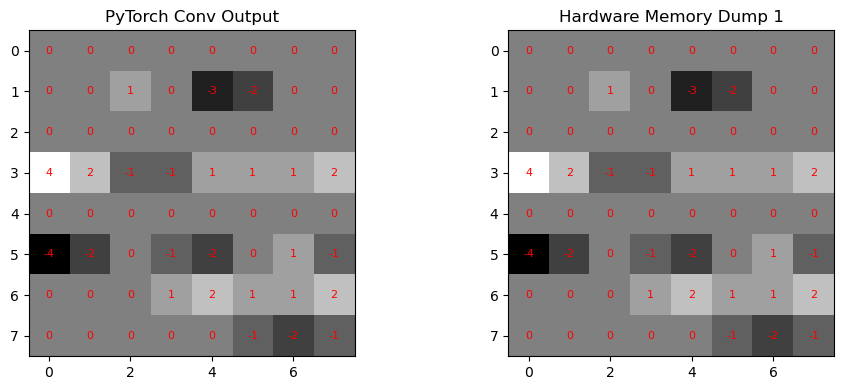

In [42]:
import matplotlib.pyplot as plt
import numpy as np

mem_dump1 = pd.read_csv(dump_folder + dump_prefix + '10.csv', header=0)
values1 = mem_dump1['ch0'].to_numpy()  # Excludes header
img_8x8_hw = values1.reshape((8, 8))

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Show PyTorch output
im0 = axs[0].imshow(out_img, cmap='gray')
axs[0].set_title("PyTorch Conv Output")
for y in range(out_img.shape[0]):
    for x in range(out_img.shape[1]):
        axs[0].text(x, y, f"{out_img[y, x]:.0f}", ha='center', va='center', color='red', fontsize=8)

# Show hardware output
im1 = axs[1].imshow(img_8x8_hw, cmap='gray')
axs[1].set_title("Hardware Memory Dump 1")
for y in range(img_8x8_hw.shape[0]):
    for x in range(img_8x8_hw.shape[1]):
        axs[1].text(x, y, f"{img_8x8_hw[y, x]:.0f}", ha='center', va='center', color='red', fontsize=8)

plt.tight_layout()
plt.show()
